#Import library

In [57]:
import pandas as pd #Module untuk manipulasi data
import numpy as np #Module untuk operasi matematika
import matplotlib.pyplot as plt #Visualisasi
import seaborn as sns #Visualisasi


#Load dataset

In [65]:
df1 = pd.read_csv('employee_data.csv')
df2 = pd.read_csv('employee_engagement_survey_data.csv')
df3 = pd.read_csv('recruitment_data.csv')
df4 = pd.read_csv('training_and_development_data.csv')

#problem statement

menganalisis karakteristik kandidat yang kemungkinan besar akan bertahan lama di perusahaan.
1.Mencari faktor-faktor yang memengaruhi staff bertahan di perusahaan
2.Membangun model prediksi staff yang kemungkinan akan keluar dari perusahaan

#data understanding

Dengan mempertimbangkan ketersediaan data yang terdiri dari 4 file csv, maka kami gabungkan ke 4 file tadi menjadi sebuah tabel guna mempermudah proses EDA dalam bentuk dataFrame.

In [66]:
df = pd.merge(df1, df2, left_on='EmpID', right_on='Employee ID', how='outer')
df = pd.merge(df, df4, left_on='EmpID', right_on='Employee ID', how='outer')

In [67]:
#df = pd.concat([df1, df2, df4], ignore_index=True)

In [61]:
df

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Work-Life Balance Score,Employee ID_y,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,3,3427,15-Jul-23,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,5,3428,12-Sep-22,Customer Service,External,Incomplete,Tammieville,Kelly Patterson DDS,4,673.02
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,1,3429,13-Aug-22,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,4,3430,15-Dec-22,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,3,3431,13-Jul-23,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3422,Jakobe,Erickson,22-Jun-22,07-Aug-22,Production Technician I,Bethany Carter,jakobe.erickson@bilearner.com,PYZ,Leave of Absence,...,3,3422,13-Mar-23,Communication Skills,Internal,Failed,Alyssaview,Paul Davis,1,707.96
2996,3423,Adyson,Strickland,28-Dec-20,NaN,Production Technician I,Caroline Harris,adyson.strickland@bilearner.com,SVG,Active,...,3,3423,14-Oct-22,Technical Skills,External,Completed,Kramerbury,David Matthews,1,439.65
2997,3424,Annabel,Wilkins,09-Dec-20,04-Aug-22,Production Technician I,Mr. James Castillo,annabel.wilkins@bilearner.com,TNS,Voluntarily Terminated,...,5,3424,18-Aug-22,Project Management,Internal,Completed,Lozanoburgh,Julie Bell,5,981.13
2998,3425,Kendra,Braun,28-May-19,23-Oct-21,Production Technician I,Michael Woods,kendra.braun@bilearner.com,WBL,Voluntarily Terminated,...,3,3425,19-May-23,Technical Skills,External,Completed,Hughesburgh,Paige Figueroa,3,184.27


#RFM Analysis

##cek type data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       3000 non-null   int64  
 1   FirstName                   3000 non-null   object 
 2   LastName                    3000 non-null   object 
 3   StartDate                   3000 non-null   object 
 4   ExitDate                    1533 non-null   object 
 5   Title                       3000 non-null   object 
 6   Supervisor                  3000 non-null   object 
 7   ADEmail                     3000 non-null   object 
 8   BusinessUnit                3000 non-null   object 
 9   EmployeeStatus              3000 non-null   object 
 10  EmployeeType                3000 non-null   object 
 11  PayZone                     3000 non-null   object 
 12  EmployeeClassificationType  3000 non-null   object 
 13  TerminationType             3000 

##cek missing value

In [69]:
df.isna().sum()

EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Employee ID_x                    0
Survey Date                      0
Engagement Score    

In [70]:
df.duplicated().sum()

0

In [71]:
df.dropna(inplace=True)

In [10]:
missing_values = df.isnull().sum()

In [72]:
missing_values

EmpID                         0
FirstName                     0
LastName                      0
StartDate                     0
ExitDate                      0
Title                         0
Supervisor                    0
ADEmail                       0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
TerminationType               0
TerminationDescription        0
DepartmentType                0
Division                      0
DOB                           0
State                         0
JobFunctionDescription        0
GenderCode                    0
LocationCode                  0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Employee ID_x                 0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Employee

#EDA

###VIS 1

In [73]:
selected_columns = df[['EmpID','Current Employee Rating','TerminationType']]
print(selected_columns)

      EmpID  Current Employee Rating TerminationType
6      3433                        4     Involuntary
7      3434                        2     Involuntary
9      3436                        5     Resignation
11     3438                        3      Retirement
12     3439                        3     Involuntary
...     ...                      ...             ...
2993   3420                        2       Voluntary
2994   3421                        1      Retirement
2995   3422                        3      Retirement
2997   3424                        2     Involuntary
2998   3425                        2     Resignation

[1533 rows x 3 columns]


In [74]:
condition_1 = selected_columns['TerminationType']=='Resignation'
condition_2 = selected_columns['Current Employee Rating']
selected_columns[condition_1 & condition_2]

,EmpID,Current Employee Rating,TerminationType
9,3436,5,Resignation
13,3440,3,Resignation
34,3461,1,Resignation
42,3469,3,Resignation
121,3548,1,Resignation
...,...,...,...
2920,3347,3,Resignation
2928,3355,5,Resignation
2944,3371,3,Resignation
2968,3395,3,Resignation


<Axes: xlabel='Current Employee Rating', ylabel='count'>

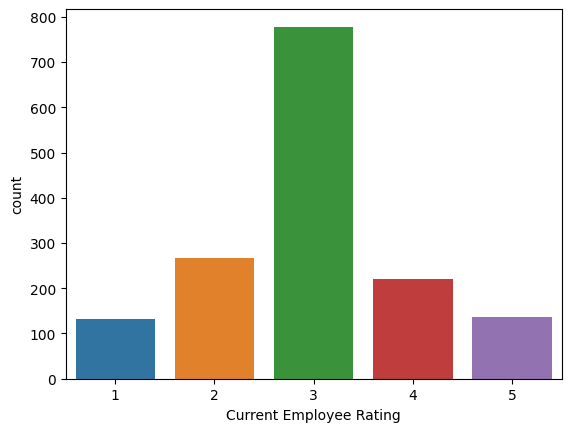

In [75]:
sns.countplot(data=selected_columns, x='Current Employee Rating')

###VIS 2

In [76]:
selected_columns = df[['EmpID', 'Performance Score','TerminationType']]
print(selected_columns)

      EmpID Performance Score TerminationType
6      3433           Exceeds     Involuntary
7      3434       Fully Meets     Involuntary
9      3436       Fully Meets     Resignation
11     3438       Fully Meets      Retirement
12     3439       Fully Meets     Involuntary
...     ...               ...             ...
2993   3420       Fully Meets       Voluntary
2994   3421       Fully Meets      Retirement
2995   3422       Fully Meets      Retirement
2997   3424       Fully Meets     Involuntary
2998   3425       Fully Meets     Resignation

[1533 rows x 3 columns]


In [77]:
condition_1 = selected_columns['TerminationType']=='Resignation'
condition_2 = selected_columns['Performance Score']
selected_columns[condition_1 & condition_2]

,EmpID,Performance Score,TerminationType
9,3436,Fully Meets,Resignation
13,3440,Fully Meets,Resignation
23,3450,Exceeds,Resignation
28,3455,Exceeds,Resignation
34,3461,Needs Improvement,Resignation
...,...,...,...
2956,3383,Exceeds,Resignation
2968,3395,Needs Improvement,Resignation
2981,3408,Fully Meets,Resignation
2982,3409,Fully Meets,Resignation


In [78]:
result = df.groupby('Performance Score').size().reset_index(name='Jumlah')
result

,Performance Score,Jumlah
0,Exceeds,191
1,Fully Meets,1202
2,Needs Improvement,91
3,PIP,49


<Axes: xlabel='Performance Score', ylabel='count'>

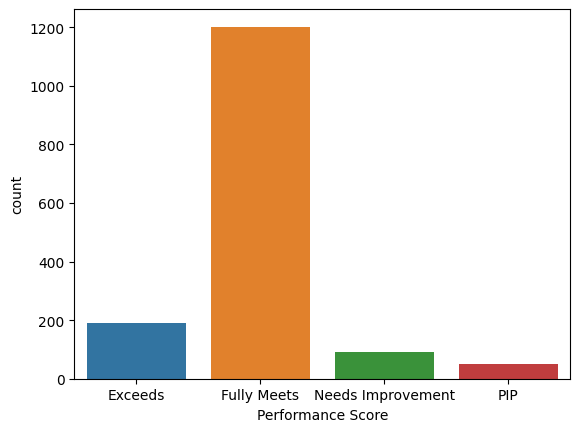

In [79]:
sns.countplot(data=selected_columns, x='Performance Score')

### VIS 3

In [80]:
selected_columns = df[['EmpID', 'RaceDesc','TerminationType']]
print(selected_columns)

      EmpID  RaceDesc TerminationType
6      3433  Hispanic     Involuntary
7      3434     White     Involuntary
9      3436     Asian     Resignation
11     3438     Asian      Retirement
12     3439     Other     Involuntary
...     ...       ...             ...
2993   3420     Other       Voluntary
2994   3421     Other      Retirement
2995   3422     Other      Retirement
2997   3424     White     Involuntary
2998   3425  Hispanic     Resignation

[1533 rows x 3 columns]


In [81]:
condition_1 = selected_columns['TerminationType']=='Resignation'
condition_2 = selected_columns['RaceDesc']
selected_columns[condition_1 & condition_2]

,EmpID,RaceDesc,TerminationType
9,3436,Asian,Resignation
13,3440,White,Resignation
23,3450,Other,Resignation
28,3455,Other,Resignation
34,3461,Hispanic,Resignation
...,...,...,...
2956,3383,Hispanic,Resignation
2968,3395,Other,Resignation
2981,3408,Asian,Resignation
2982,3409,Asian,Resignation


In [82]:
result = df.groupby('RaceDesc').size().reset_index(name='Jumlah')
result

,RaceDesc,Jumlah
0,Asian,333
1,Black,311
2,Hispanic,292
3,Other,298
4,White,299


<Axes: xlabel='RaceDesc', ylabel='count'>

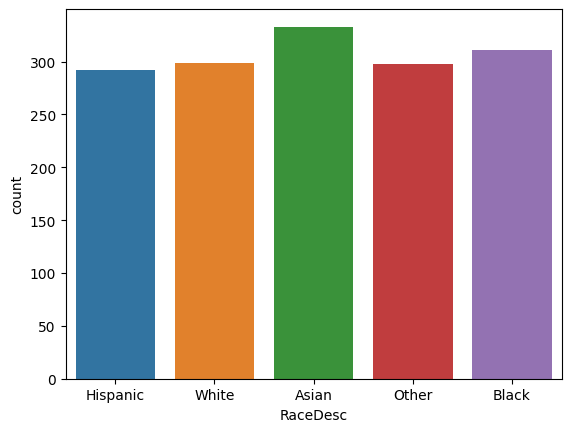

In [83]:
sns.countplot(data=selected_columns, x='RaceDesc')

###EDA 2

In [84]:
df.describe()

,EmpID,LocationCode,Current Employee Rating,Employee ID_x,Engagement Score,Satisfaction Score,Work-Life Balance Score,Employee ID_y,Training Duration(Days),Training Cost
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,2511.155251,44586.011742,2.976517,2511.155251,2.938682,3.010437,2.952381,2511.155251,2.977821,559.314834
std,867.585743,29928.659074,1.009470,867.585743,1.436706,1.407234,1.422847,867.585743,1.407098,259.915581
min,1002.000000,1013.000000,1.000000,1002.000000,1.000000,1.000000,1.000000,1002.000000,1.000000,100.170000
25%,1753.000000,17123.000000,2.000000,1753.000000,2.000000,2.000000,2.000000,1753.000000,2.000000,331.520000
50%,2503.000000,43998.000000,3.000000,2503.000000,3.000000,3.000000,3.000000,2503.000000,3.000000,573.330000
75%,3253.000000,70147.000000,3.000000,3253.000000,4.000000,4.000000,4.000000,3253.000000,4.000000,781.810000
max,4000.000000,98052.000000,5.000000,4000.000000,5.000000,5.000000,5.000000,4000.000000,5.000000,999.960000


In [85]:
train = df[['EmpID', 'Training Outcome']]
train

,EmpID,Training Outcome
6,3433,Passed
7,3434,Passed
9,3436,Failed
11,3438,Failed
12,3439,Incomplete
...,...,...
2993,3420,Passed
2994,3421,Passed
2995,3422,Failed
2997,3424,Completed


In [87]:
selected_columns = df[['EmpID','StartDate', 'Training Outcome','EmployeeStatus']]
print(selected_columns)

      EmpID  StartDate Training Outcome          EmployeeStatus
6      3433  06-Apr-22           Passed                  Active
7      3434  06-Nov-20           Passed                  Active
9      3436  21-Jan-22           Failed                  Active
11     3438  10-Aug-18           Failed                  Active
12     3439  25-May-22       Incomplete                  Active
...     ...        ...              ...                     ...
2993   3420  10-Oct-20           Passed                  Active
2994   3421  09-May-22           Passed                  Active
2995   3422  22-Jun-22           Failed        Leave of Absence
2997   3424  09-Dec-20        Completed  Voluntarily Terminated
2998   3425  28-May-19        Completed  Voluntarily Terminated

[1533 rows x 4 columns]


In [88]:
condition_1 = selected_columns['Training Outcome']=='Completed'
condition_2 = selected_columns['EmployeeStatus']=='Active'
selected_columns[condition_1 & condition_2]

,EmpID,StartDate,Training Outcome,EmployeeStatus
23,3450,01-Sep-20,Completed,Active
24,3451,18-Feb-21,Completed,Active
35,3462,13-Sep-18,Completed,Active
59,3486,31-Oct-22,Completed,Active
79,3506,27-Aug-19,Completed,Active
...,...,...,...,...
2820,3247,20-Apr-23,Completed,Active
2821,3248,07-Aug-18,Completed,Active
2871,3298,19-Nov-20,Completed,Active
2937,3364,05-Mar-21,Completed,Active


In [89]:
result = df['EmployeeStatus'].value_counts().reset_index(name='Jumlah')
result

,index,Jumlah
0,Active,991
1,Voluntarily Terminated,321
2,Leave of Absence,86
3,Future Start,69
4,Terminated for Cause,66


<Axes: xlabel='EmployeeStatus', ylabel='count'>

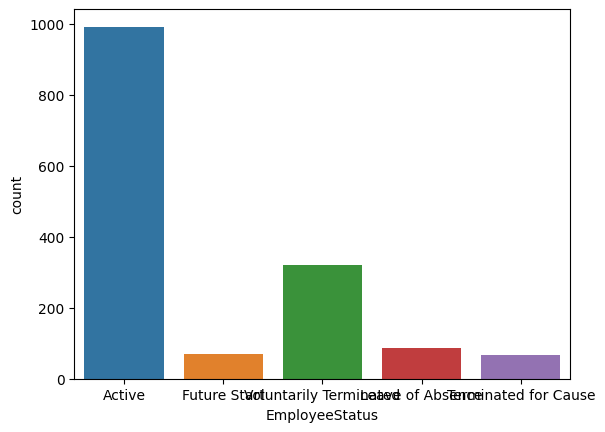

In [90]:
sns.countplot(data=selected_columns, x='EmployeeStatus')

In [92]:
min_start_date = df['StartDate'].min()
min_start_date

'01-Apr-21'

In [93]:
min_start_date = df['StartDate'].max()
min_start_date

'31-Oct-22'

In [94]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['ExitDate'] = pd.to_datetime(df['ExitDate'])

In [95]:
df['MasaKerja'] = (df['ExitDate'] - df['StartDate']).dt.days

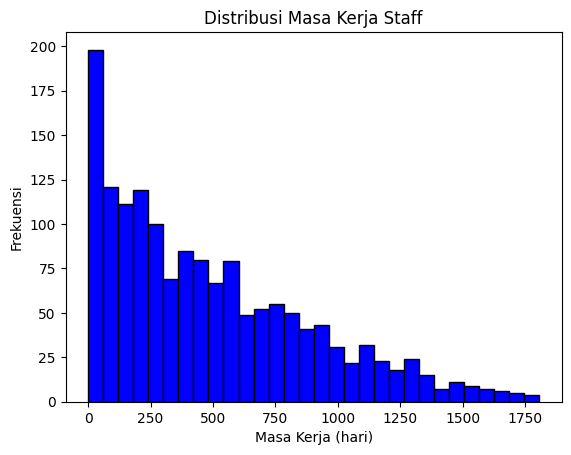

In [96]:
plt.hist(df['MasaKerja'], bins=30, color='blue', edgecolor='black')
plt.title('Distribusi Masa Kerja Staff')
plt.xlabel('Masa Kerja (hari)')
plt.ylabel('Frekuensi')
plt.show()

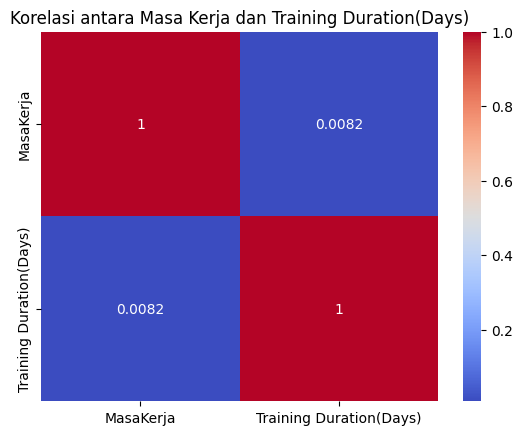

In [97]:
correlation = df[['MasaKerja', 'Training Duration(Days)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Masa Kerja dan Training Duration(Days)')
plt.show()

Visualisasi ini bertujuan untuk mengevaluasi sejauh mana variabel "Masa Kerja" berkorelasi dengan variabel "Training Hours".
Jika heatmap mendominasi warna merah atau biru (dengan nilai mendekati -1 atau 1), itu menunjukkan adanya korelasi antara dua variabel tersebut. Jika mendekati 0, itu menunjukkan tidak adanya korelasi yang signifikan.

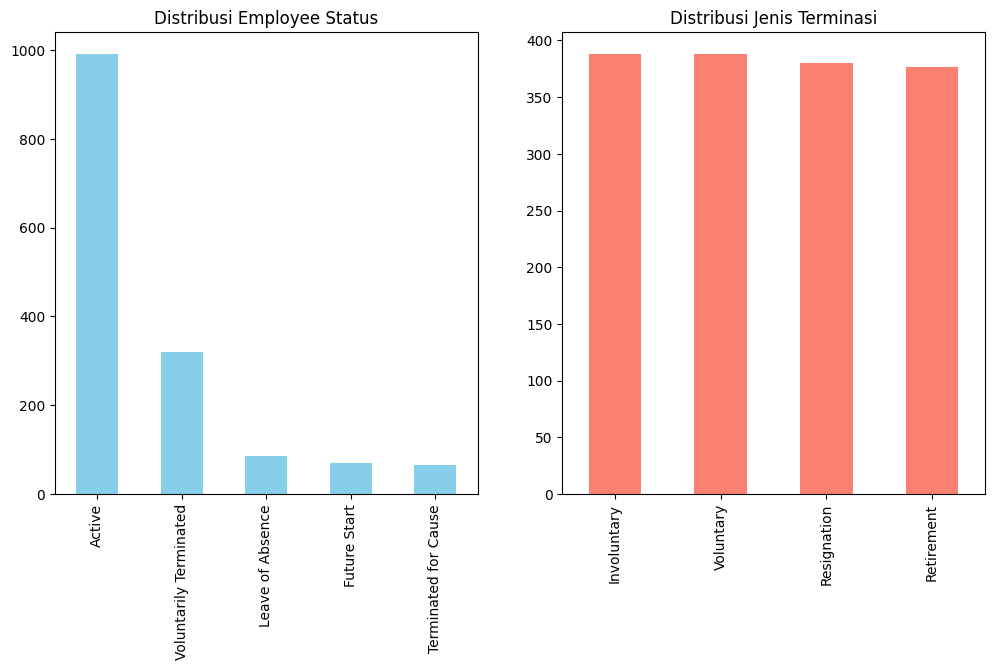

In [98]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['EmployeeStatus'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Employee Status')

plt.subplot(1, 2, 2)
df['TerminationType'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribusi Jenis Terminasi')

plt.show()

<ipython-input-99-55e709309202>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


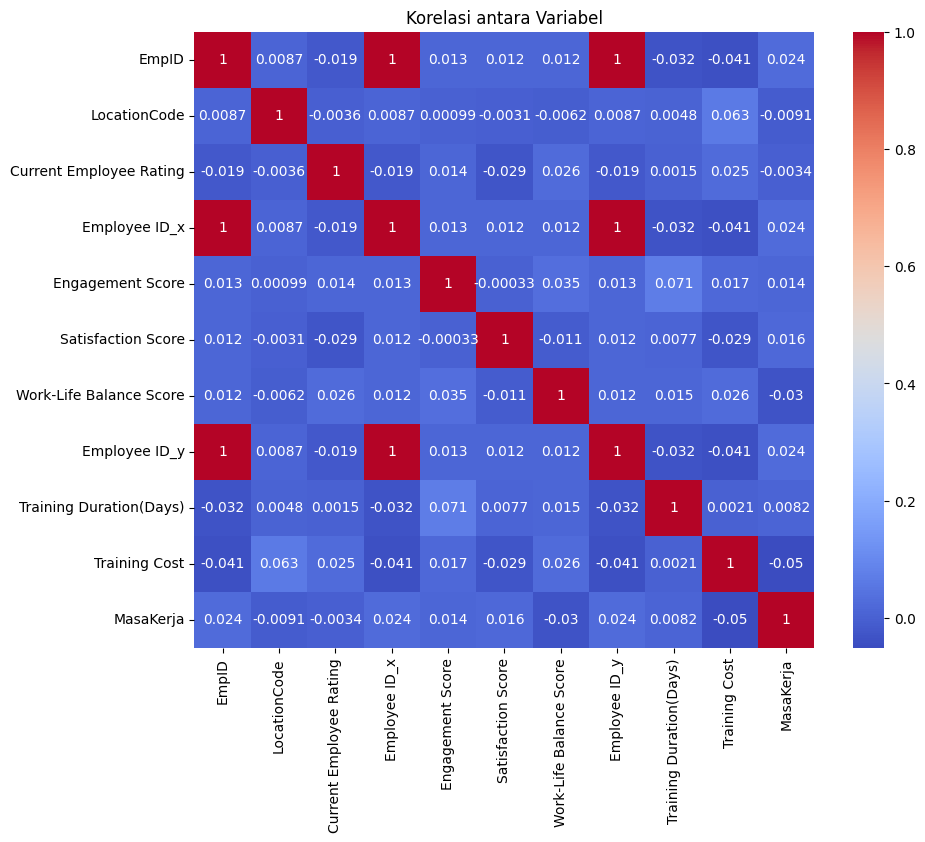

In [99]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel')
plt.show()

#MODEL

In [100]:
df.keys()

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'Employee ID_x', 'Survey Date',
       'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'Employee ID_y', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Location', 'Trainer',
       'Training Duration(Days)', 'Training Cost', 'MasaKerja'],
      dtype='object')

In [39]:
df.describe()

,EmpID,LocationCode,Current Employee Rating,Employee ID_x,Engagement Score,Satisfaction Score,Work-Life Balance Score,Employee ID_y,Training Duration(Days),Training Cost,MasaKerja
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,2511.155251,44586.011742,2.976517,2511.155251,2.938682,3.010437,2.952381,2511.155251,2.977821,559.314834,488.121331
std,867.585743,29928.659074,1.009470,867.585743,1.436706,1.407234,1.422847,867.585743,1.407098,259.915581,405.430582
min,1002.000000,1013.000000,1.000000,1002.000000,1.000000,1.000000,1.000000,1002.000000,1.000000,100.170000,0.000000
25%,1753.000000,17123.000000,2.000000,1753.000000,2.000000,2.000000,2.000000,1753.000000,2.000000,331.520000,152.000000
50%,2503.000000,43998.000000,3.000000,2503.000000,3.000000,3.000000,3.000000,2503.000000,3.000000,573.330000,391.000000
75%,3253.000000,70147.000000,3.000000,3253.000000,4.000000,4.000000,4.000000,3253.000000,4.000000,781.810000,743.000000
max,4000.000000,98052.000000,5.000000,4000.000000,5.000000,5.000000,5.000000,4000.000000,5.000000,999.960000,1807.000000


##Variable

In [40]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['EmployeeStatus'] = label_encoder.fit_transform(df['EmployeeStatus'])

In [ ]:
X_train = np.array(df[["Satisfaction Score","Current Employee Rating"]])
y_train = np.array(df["EmployeeStatus"])

In [ ]:
# y_train

In [ ]:
# label_encoder.classes_

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# lb = label_encoder()
# y_train = lb.fit_transform(y_train)
# print(f'y_train:\n{y_train}')

##Splitting Dataset

In [41]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.2,
#                                                      random_state=1
#                                                    )

##Tipe Machine learning

In [42]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

In [43]:
# logreg = LogisticRegression()
# dt = DecisionTreeClassifier()

In [44]:
# logreg.fit(X_train, y_train)
# dt.fit(X_train, y_train)

In [45]:
# y_pred_lr = logreg.predict(X_test)
# y_pred_dt = dt.predict(X_test)

In [46]:
# from sklearn.neighbors import KNeighborsClassifier
# K = 3
# model = KNeighborsClassifier(n_neighbors = K)
# model.fit(X_train, y_train)

In [47]:
#  y_pred = model.predict(X_test)
#  y_pred

##Vis

##Evaluasi Model

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# from inspect import ClassFoundException
# print(classification_report(y_test, y_pred_lr))
# print(classification_report(y_test, y_pred_dt))

In [ ]:
# print(confusion_matrix(y_test, y_pred_lr))
# print(confusion_matrix(y_test, y_pred_dt))

In [ ]:
# pd.crosstab(y_test, y_pred)

In [ ]:
# pd.DataFrame({"pred": y_pred,
#               "actual": y_test
#               })

In [ ]:
confusion = np.array([[90, 10], [20, 80]])

In [ ]:
# plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
# plt.colorbar()
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')

In [ ]:
# from sklearn.metrics import accuracy_score,precision_score

# y_pred = model.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(f'accuracy:{acc}')

In [101]:
status_kar = df.groupby('EmployeeStatus').size().reset_index(name='Jumlah')
result

,index,Jumlah
0,Active,991
1,Voluntarily Terminated,321
2,Leave of Absence,86
3,Future Start,69
4,Terminated for Cause,66


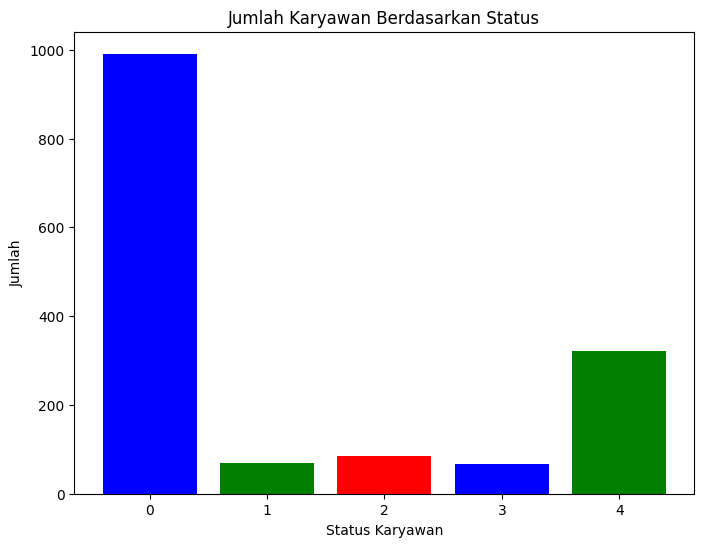

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(status_kar['EmployeeStatus'], status_kar['Jumlah'], color=['blue', 'green', 'red'])
plt.title('Jumlah Karyawan Berdasarkan Status')
plt.xlabel('Status Karyawan')
plt.ylabel('Jumlah')
plt.show()

Text(0.5, 1.0, 'Jumlah Karyawan resign dari tahun ke tahun')

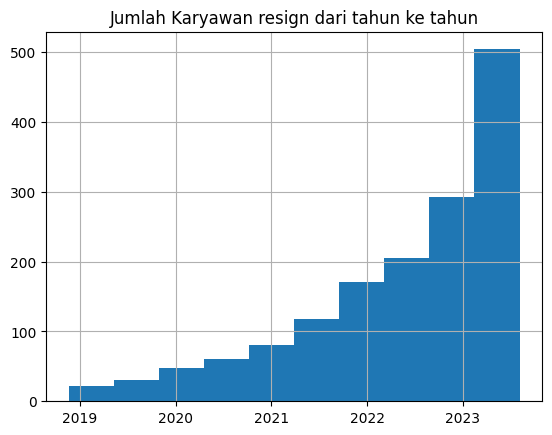

In [51]:
df['ExitDate'].hist()
plt.title('Jumlah Karyawan resign dari tahun ke tahun')

In [52]:
df['ExitYear'] = pd.to_datetime(df['ExitDate']).dt.year
tahun = df[df['TerminationType'] == 'Resignation'].groupby('ExitYear').size().reset_index(name='Jumlah')
tahun

,ExitYear,Jumlah
0,2018,1
1,2019,13
2,2020,28
3,2021,82
4,2022,118
5,2023,138


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Menyesuaikan model dengan data yang ada
X_train = tahun['ExitYear'].values.reshape(-1, 1)
y_train = tahun['Jumlah'].values
model.fit(X_train, y_train)

# Membuat prediksi untuk tahun 2024
tahun_2024 = np.array([[2024]])
prediksi_2024 = model.predict(tahun_2024)

print(f'Prediksi jumlah resignasi untuk tahun 2024: {prediksi_2024[0]}')

Prediksi jumlah resignasi untuk tahun 2024: 168.7333333333372


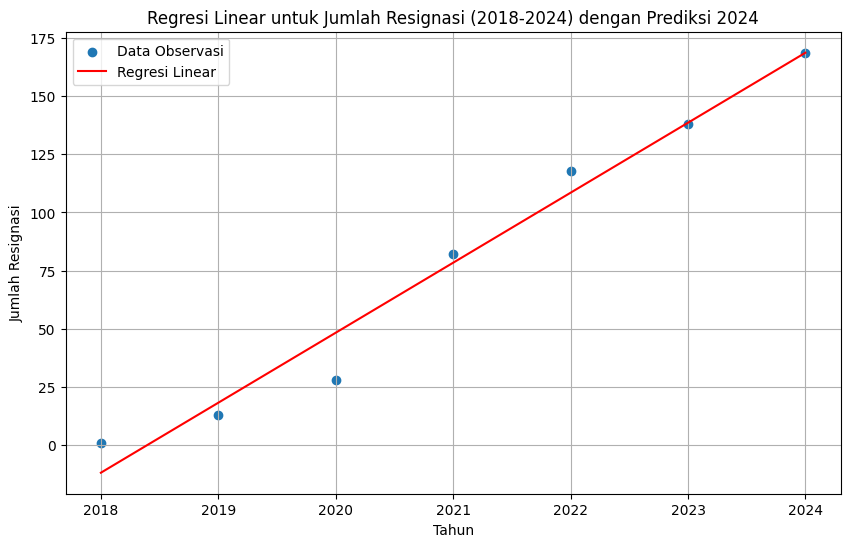

In [54]:
# Menambahkan prediksi untuk tahun 2024 ke DataFrame
tahun_prediksi = tahun.copy()
tahun_prediksi.loc[len(tahun_prediksi)] = [2024, prediksi_2024[0]]

# Membuat model regresi linier
model = LinearRegression()

# Menyesuaikan model dengan data yang ada
X_train = tahun_prediksi['ExitYear'].values.reshape(-1, 1)
y_train = tahun_prediksi['Jumlah'].values
model.fit(X_train, y_train)

# Membuat plot regresi linear dengan prediksi untuk tahun 2024
years = np.arange(2018, 2025, 1).reshape(-1, 1)
predictions = model.predict(years)

plt.figure(figsize=(10, 6))
plt.scatter(tahun_prediksi['ExitYear'], tahun_prediksi['Jumlah'], label='Data Observasi')
plt.plot(years, predictions, label='Regresi Linear', color='red')
plt.title('Regresi Linear untuk Jumlah Resignasi (2018-2024) dengan Prediksi 2024')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Resignasi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error
# y_pred = model.predict(X_train)
# mae = mean_absolute_error(y_train, y_pred)
# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')